In [13]:
import os 
import numpy as np
import glob
import random
import imageio
import PIL, cv2
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten, Activation, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import models, layers
from tensorflow.keras.utils import to_categorical
from skimage.morphology import convex_hull_image, erosion
from skimage.morphology import square
import matplotlib.image as mpimg
import skimage
import math
from scipy.ndimage.filters import convolve
from PIL import Image, ImageFilter
from skimage.feature import hessian_matrix, hessian_matrix_eigvals
import matplotlib.pyplot as plt


In [5]:
pip install --upgrade keras tensorflow


   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.1 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.1 MB ? eta -:--:--
   --- ------------------------------------ 0.1/1.1 MB 930.9 kB/s eta 0:00:02
   --- ------------------------------------ 0.1/1.1 MB 930.9 kB/s eta 0:00:02
   --- ------------------------------------ 0.1/1.1 MB 930.9 kB/s eta 0:00:02
   --- ------------------------------------ 0.1/1.1 MB 930.9 kB/s eta 0:00:02
   --- ------------------------------------ 0.1/1.1 MB 930.9 kB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.1 MB 588.9 kB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.1 MB 588.9 kB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.1 MB 588.9 kB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.1 MB 588.9 kB/s eta 0:00:02
   ----------- -------

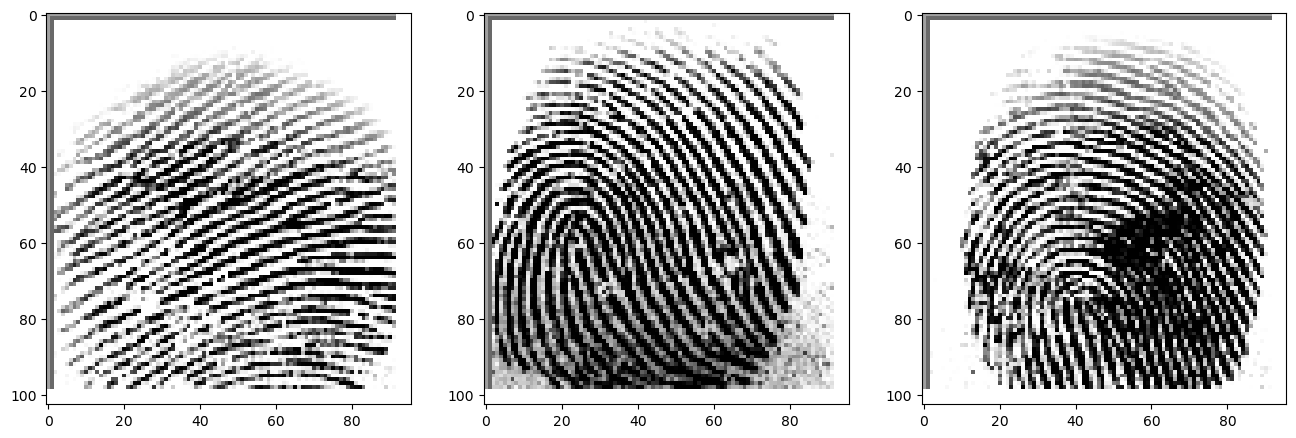

In [15]:


DATA_DIR =r"C:/Users/HARISREE AKULA/Downloads/archive (8)/SOCOFing/Real" # Path to the SOCOFing dataset

# Find all image files in the Real directory
list_dirs = glob.glob(DATA_DIR + "\\*.bmp")  # Assuming the images have the .bmp extension

num_images = len(list_dirs)
random.seed(23)

if num_images >= 3:
    r = random.randint(0, num_images - 3)
    display_list = list_dirs[r:r+3]

    image1 = imageio.imread(display_list[0])
    image2 = imageio.imread(display_list[1])
    image3 = imageio.imread(display_list[2])

    fig, axes = plt.subplots(1, 3, figsize=(16, 16))
    axes[0].imshow(image1, cmap='gray')  # Assuming grayscale fingerprint images
    axes[1].imshow(image2, cmap='gray')
    axes[2].imshow(image3, cmap='gray')
    plt.show()
else:
    print("Not enough images in the list.")


In [7]:
import keras
import tensorflow as tf
print(f"Keras version: {keras.__version__}")
print(f"TensorFlow version: {tf.__version__}")


Keras version: 3.4.1
TensorFlow version: 2.17.0


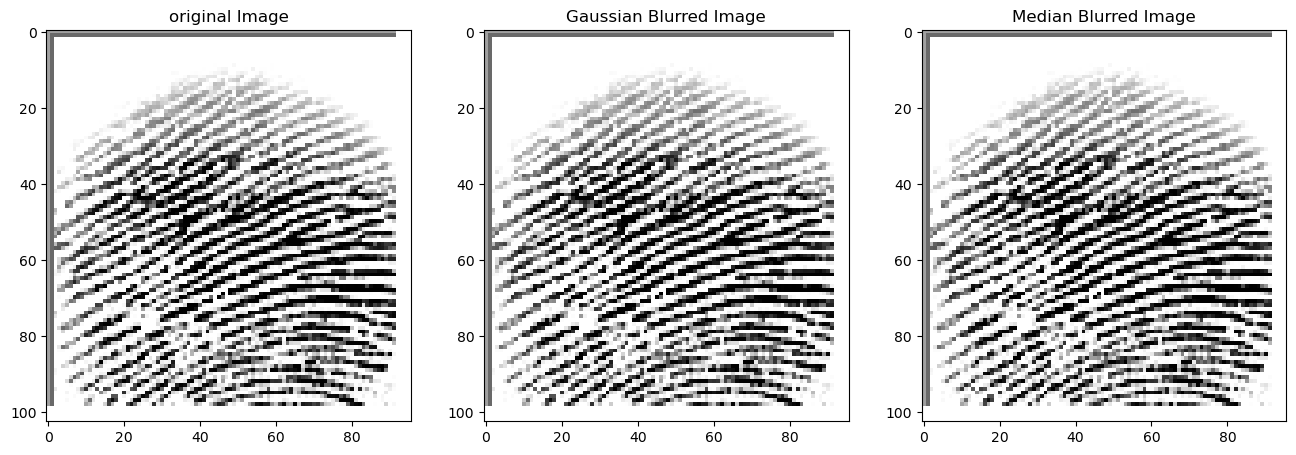

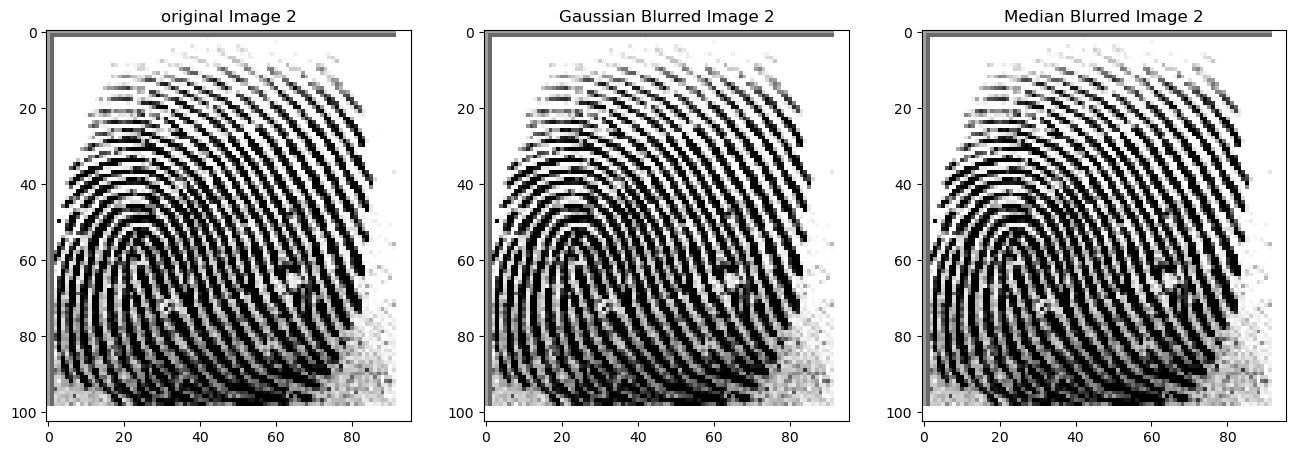

In [17]:
gauss_blur = cv2.GaussianBlur(image1,(1,1),0)
median_blur = cv2.medianBlur(image1,1)

gauss_blur2 = cv2.GaussianBlur(image2,(1,1),0)
median_blur2 = cv2.medianBlur(image2,1)

fig, axes = plt.subplots(1,3,figsize = (16,16));
axes[0].set_title("original Image");
axes[0].imshow(image1);
axes[1].set_title("Gaussian Blurred Image");
axes[1].imshow(gauss_blur);
axes[2].set_title("Median Blurred Image");
axes[2].imshow(median_blur);
fig, axes = plt.subplots(1,3,figsize = (16,16));
axes[0].set_title("original Image 2");
axes[0].imshow(image2);
axes[1].set_title("Gaussian Blurred Image 2");
axes[1].imshow(gauss_blur2);
axes[2].set_title("Median Blurred Image 2");
axes[2].imshow(median_blur2);

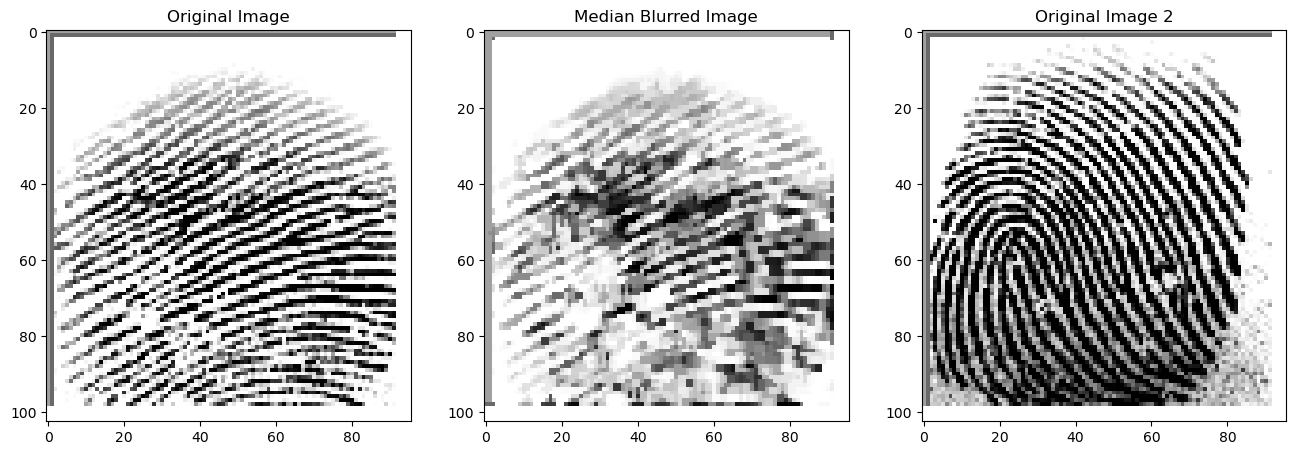

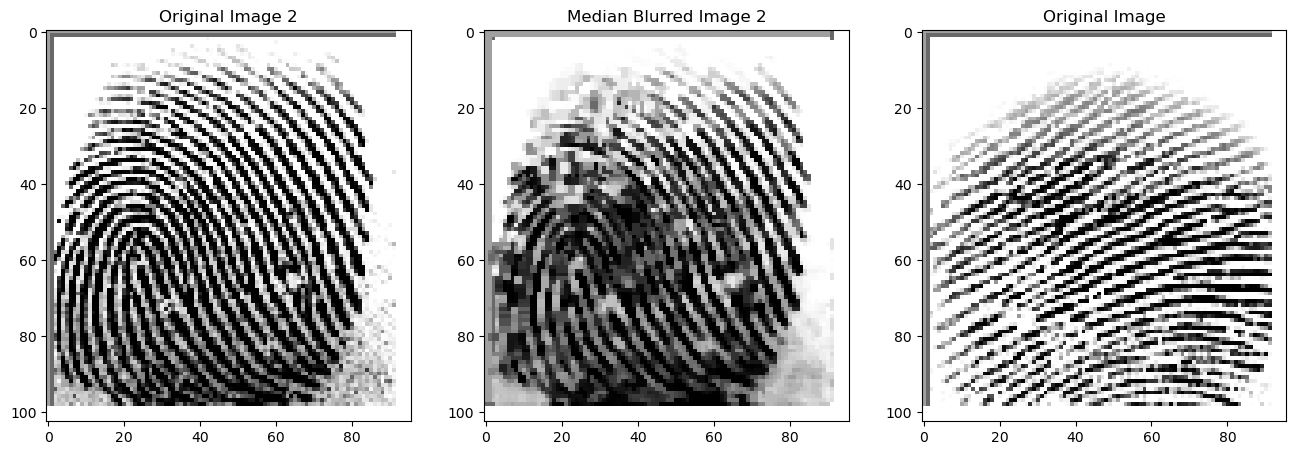

In [19]:
median_blur = cv2.medianBlur(image1, 3)
median_blur2 = cv2.medianBlur(image2, 3)

fig, axes = plt.subplots(1, 3, figsize=(16, 16))
axes[0].set_title("Original Image")
axes[0].imshow(image1)
axes[1].set_title("Median Blurred Image")
axes[1].imshow(median_blur)
axes[2].set_title("Original Image 2")
axes[2].imshow(image2)
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(16, 16))
axes[0].set_title("Original Image 2")
axes[0].imshow(image2)
axes[1].set_title("Median Blurred Image 2")
axes[1].imshow(median_blur2)
axes[2].set_title("Original Image")
axes[2].imshow(image1)
plt.show()


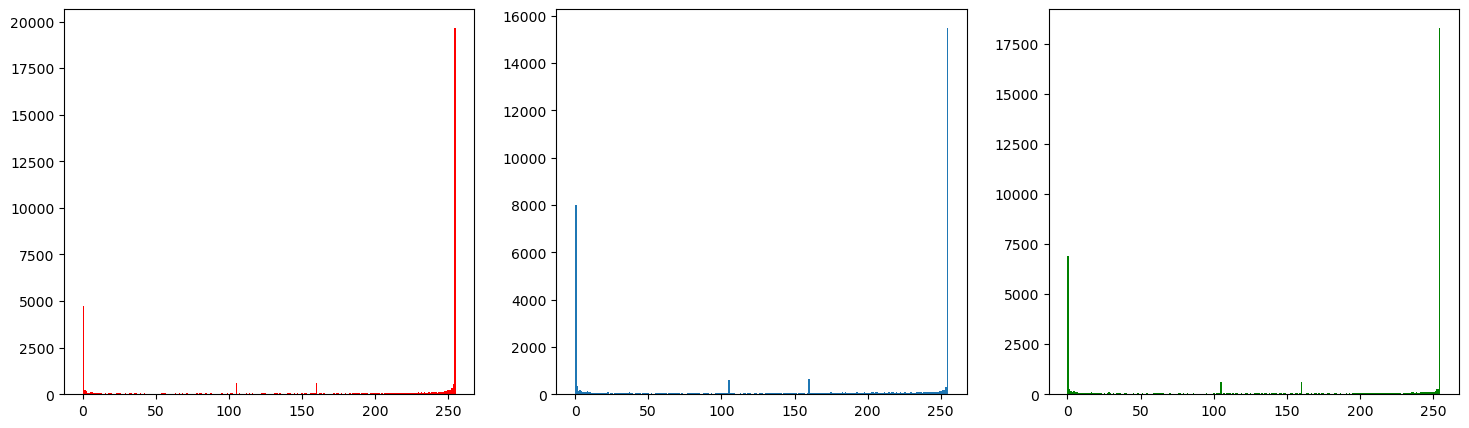

In [21]:
fig, axes = plt.subplots(1,3,figsize = (18,5))
axes[0].hist(image1.ravel(), bins=256, color ="r");
axes[1].hist(image2.ravel(), bins=256);
axes[2].hist(image3.ravel(), bins=256, color ="g");

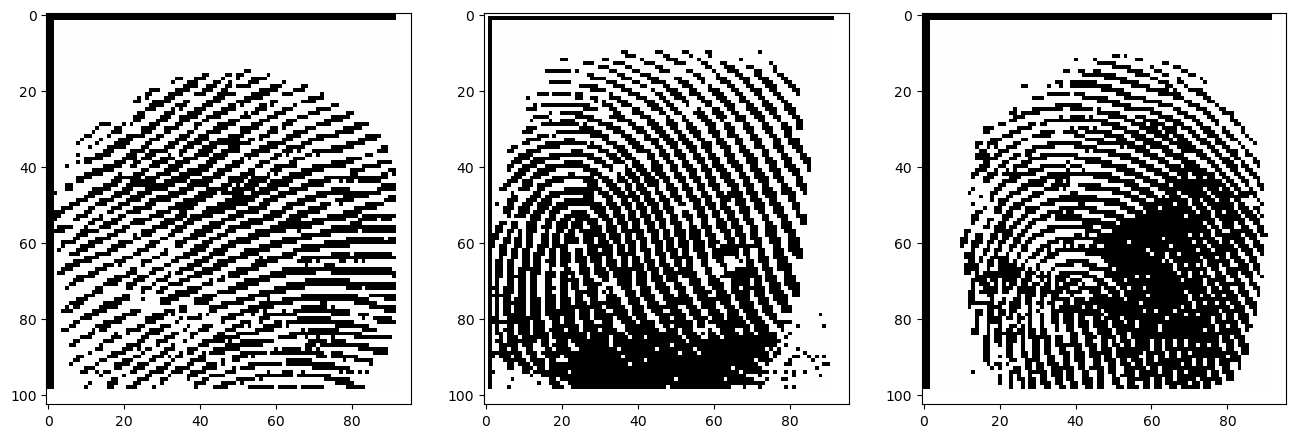

In [23]:
THRESHOLD1 = image1.mean()
THRESHOLD2 = image2.mean()
THRESHOLD3 = image3.mean()

image1 = np.array(image1 > THRESHOLD1).astype(int) * 254
image2 = np.array(image2 > THRESHOLD2).astype(int) * 254
image3 = np.array(image3 > THRESHOLD3).astype(int) * 254

fig, axes = plt.subplots(1,3,figsize = (16,16));
axes[0].imshow(image1);
axes[1].imshow(image2);
axes[2].imshow(image3);

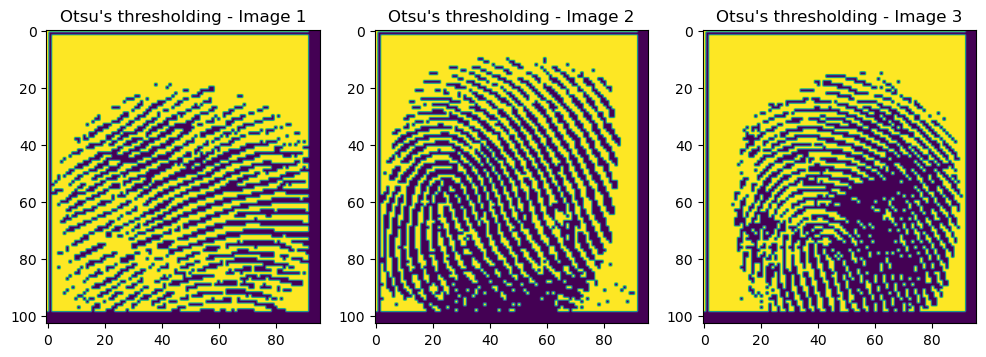

In [25]:
img1 = cv2.imread(display_list[0],0)
img2 = cv2.imread(display_list[1],0)
img3 = cv2.imread(display_list[2],0)

# Otsu's thresholding
ret1,th1 = cv2.threshold(img1,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret2,th2 = cv2.threshold(img2,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret3,th3 = cv2.threshold(img3,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

fig, axes = plt.subplots(1,3,figsize = (12,12));
axes[0].set_title("Otsu's thresholding - Image 1");
axes[0].imshow(th1);
axes[1].set_title("Otsu's thresholding - Image 2");
axes[1].imshow(th2);
axes[2].set_title("Otsu's thresholding - Image 3");
axes[2].imshow(th3);


In [27]:
img_name = display_list[0]
gray_img_array = np.array(Image.open(img_name).convert('P'))
img_name = display_list[1]
gray_img_array = np.array(Image.open(img_name).convert('P'))
img_name = display_list[2]
gray_img_array = np.array(Image.open(img_name).convert('P'))


In [29]:
vertical_robert_filter = np.array([[1,0],[0,-1]])
horizontal_robert_filter = np.array([[0,1],[-1,0]])

vertical_sobel_filter = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
horizontal_sobel_filter = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

vertical_prewitt_filter = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
horizontal_prewitt_filter = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])

print("vertical robert filter\n",vertical_robert_filter )
print("horizontal robert filter\n",horizontal_robert_filter)
print("vertical sobel filter: \n", vertical_sobel_filter)
print("horizontal sobel filter: \n", horizontal_sobel_filter)

print("vertical prewitt filter: \n", vertical_prewitt_filter)
print("horizontal prewitt filter: \n", horizontal_prewitt_filter)

vertical robert filter
 [[ 1  0]
 [ 0 -1]]
horizontal robert filter
 [[ 0  1]
 [-1  0]]
vertical sobel filter: 
 [[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
horizontal sobel filter: 
 [[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]
vertical prewitt filter: 
 [[-1  0  1]
 [-1  0  1]
 [-1  0  1]]
horizontal prewitt filter: 
 [[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]


In [31]:
gray_img = Image.fromarray(gray_img_array)

convolved_img1_1 = convolve(gray_img,vertical_robert_filter)
convolved_img1_1 = convolve(convolved_img1_1,horizontal_robert_filter)

convolved_img1_2 = convolve(gray_img,vertical_sobel_filter)
convolved_img1_2 = convolve(convolved_img1_2,horizontal_sobel_filter)

convolved_img1_3 =  convolve(gray_img,vertical_prewitt_filter )
convolved_img1_3 =  convolve(gray_img,horizontal_prewitt_filter )

convolved_img2_1 = convolve(gray_img,vertical_robert_filter)
convolved_img2_1 = convolve(convolved_img2_1,horizontal_robert_filter)

convolved_img2_2 = convolve(gray_img,vertical_sobel_filter)
convolved_img2_2 = convolve(convolved_img2_2,horizontal_sobel_filter)

convolved_img2_3 =  convolve(gray_img,vertical_prewitt_filter )
convolved_img2_3 =  convolve(gray_img,horizontal_prewitt_filter )

convolved_img3_1 = convolve(gray_img,vertical_robert_filter)
convolved_img3_1 = convolve(convolved_img3_1,horizontal_robert_filter)

convolved_img3_2 = convolve(gray_img,vertical_sobel_filter)
convolved_img3_2 = convolve(convolved_img3_2,horizontal_sobel_filter)

convolved_img3_3 =  convolve(gray_img,vertical_prewitt_filter )
convolved_img3_3 =  convolve(gray_img,horizontal_prewitt_filter )

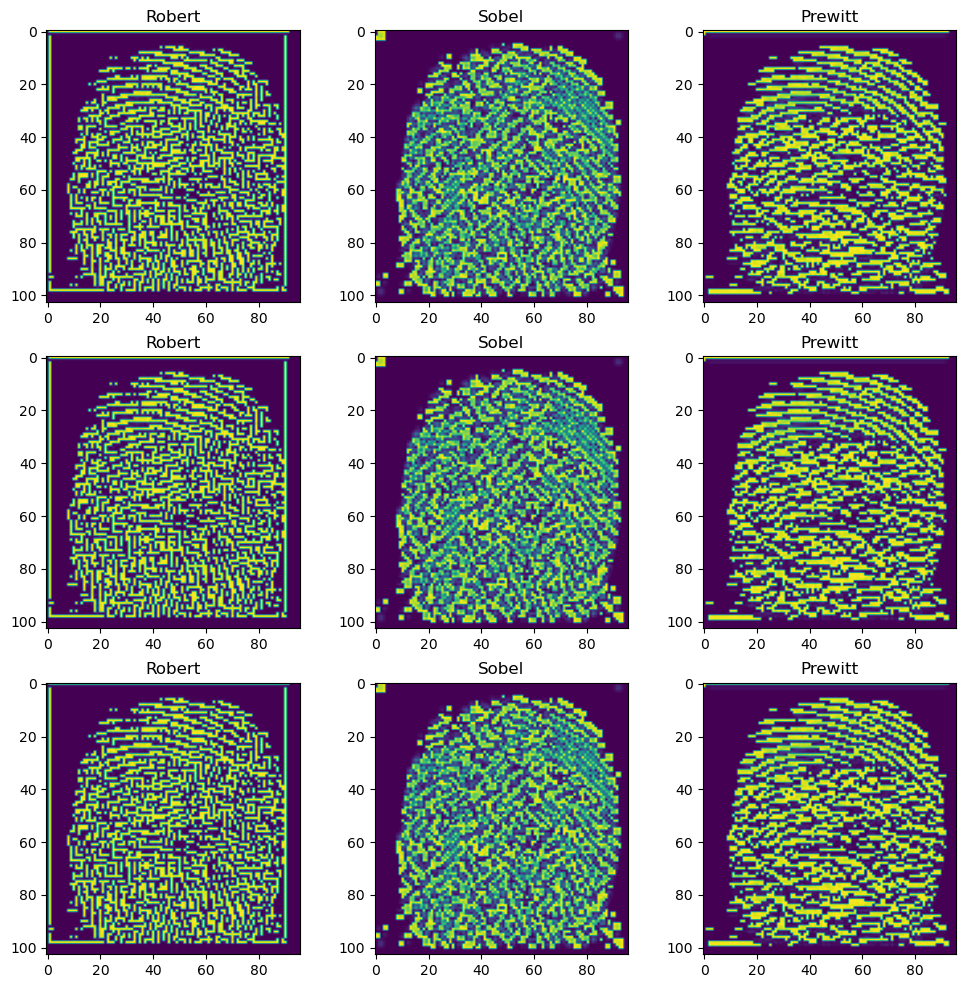

In [33]:
fig, axes = plt.subplots(3,3,figsize = (12,12));
axes[0][0].set_title("Robert");
axes[0][0].imshow(convolved_img1_1);
axes[0][1].set_title("Sobel");
axes[0][1].imshow(convolved_img1_2);
axes[0][2].set_title("Prewitt");
axes[0][2].imshow(convolved_img1_3);

axes[1][0].set_title("Robert");
axes[1][0].imshow(convolved_img2_1);
axes[1][1].set_title("Sobel");
axes[1][1].imshow(convolved_img2_2);
axes[1][2].set_title("Prewitt");
axes[1][2].imshow(convolved_img2_3);

axes[2][0].set_title("Robert");
axes[2][0].imshow(convolved_img3_1);
axes[2][1].set_title("Sobel");
axes[2][1].imshow(convolved_img3_2);
axes[2][2].set_title("Prewitt");
axes[2][2].imshow(convolved_img3_3);

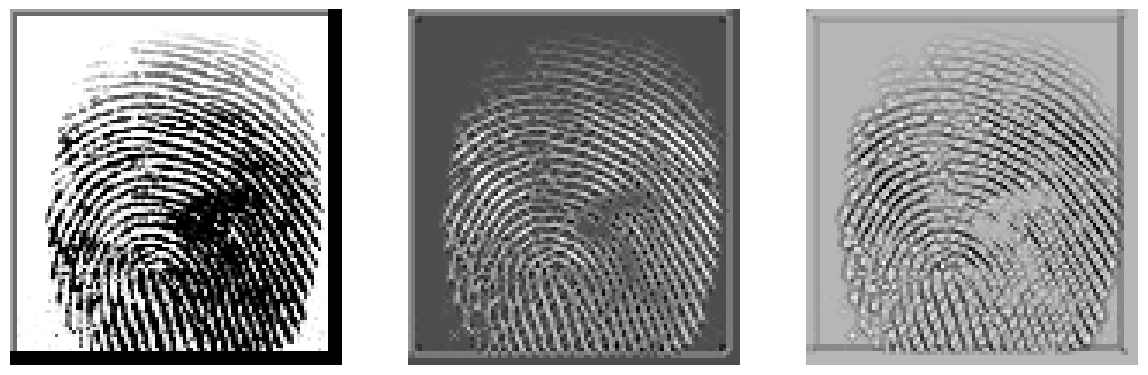

In [35]:
src_path = img_name

def detect_ridges(gray, sigma= 0.1):
    H_elems = hessian_matrix(gray, sigma=sigma, order='rc')
    maxima_ridges, minima_ridges = hessian_matrix_eigvals(H_elems)
    return maxima_ridges, minima_ridges

def plot_images(*images):
    images = list(images)
    n = len(images)
    fig, ax = plt.subplots(ncols=n, sharey=True, figsize = (12,12))
    for i, img in enumerate(images):
        ax[i].imshow(img, cmap='gray')
        ax[i].axis('off')
    plt.subplots_adjust(left=0.03, bottom=0.03, right=0.97, top=0.97)
    plt.show()

img = cv2.imread(src_path, 0) # 0 imports a grayscale
if img is None:
    raise(ValueError(f"Image didn\'t load. Check that '{src_path}' exists."))

a, b = detect_ridges(img, sigma=0.15)

plot_images(img, a, b)

In [37]:
def getTerminationBifurcation(img, mask):
    img = img == 255;
    (rows, cols) = img.shape;
    minutiaeTerm = np.zeros(img.shape);
    minutiaeBif = np.zeros(img.shape);
    
    for i in range(1,rows-1):
        for j in range(1,cols-1):
            if(img[i][j] == 1):
                block = img[i-1:i+2,j-1:j+2];
                block_val = np.sum(block);
                if(block_val == 2):
                    minutiaeTerm[i,j] = 1;
                elif(block_val == 4):
                    minutiaeBif[i,j] = 1;
    
    mask = convex_hull_image(mask>0)
    mask = erosion(mask, square(5))         
    minutiaeTerm = np.uint8(mask)*minutiaeTerm
    return(minutiaeTerm, minutiaeBif)

In [39]:
class MinutiaeFeature(object):
    def __init__(self, locX, locY, Orientation, Type):
        self.locX = locX;
        self.locY = locY;
        self.Orientation = Orientation;
        self.Type = Type;
    
    def __str__(self):
        return("%d %d %f %s" % (self.locX, self.locY, self.Orientation, self.Type))

def computeAngle(block, minutiaeType):
    angle = 0
    (blkRows, blkCols) = np.shape(block);
    CenterX, CenterY = (blkRows-1)/2, (blkCols-1)/2
    if(minutiaeType.lower() == 'termination'):
        sumVal = 0;
        for i in range(blkRows):
            for j in range(blkCols):
                if((i == 0 or i == blkRows-1 or j == 0 or j == blkCols-1) and block[i][j] != 0):
                    angle = -math.degrees(math.atan2(i-CenterY, j-CenterX))
                    sumVal += 1
                    if(sumVal > 1):
                        angle = float('nan');
        return(angle)
    elif(minutiaeType.lower() == 'bifurcation'):
        (blkRows, blkCols) = np.shape(block);
        CenterX, CenterY = (blkRows - 1) / 2, (blkCols - 1) / 2
        angle = []
        sumVal = 0;
        for i in range(blkRows):
            for j in range(blkCols):
                if ((i == 0 or i == blkRows - 1 or j == 0 or j == blkCols - 1) and block[i][j] != 0):
                    angle.append(-math.degrees(math.atan2(i - CenterY, j - CenterX)))
                    sumVal += 1
        if(sumVal != 3):
            angle = float('nan')
        return(angle)
# def keySortX(e):
#     return e['locX']

# def keySortY(e):
#     return e['locY']
    
def extractMinutiaeFeatures(skel, minutiaeTerm, minutiaeBif):
    FeaturesTerm = []

    minutiaeTerm = skimage.measure.label(minutiaeTerm, connectivity=2);
    RP = skimage.measure.regionprops(minutiaeTerm)
    
    WindowSize = 2          
    FeaturesTerm = []
    for i in RP:
        (row, col) = np.int16(np.round(i['Centroid']))
        block = skel[row-WindowSize:row+WindowSize+1, col-WindowSize:col+WindowSize+1]
        angle = computeAngle(block, 'Termination')
        FeaturesTerm.append(MinutiaeFeature(row, col, angle, 'Termination'))

    FeaturesBif = []
    minutiaeBif = skimage.measure.label(minutiaeBif, connectivity=2);
    RP = skimage.measure.regionprops(minutiaeBif)
    WindowSize = 1 
    for i in RP:
        (row, col) = np.int16(np.round(i['Centroid']))
        block = skel[row-WindowSize:row+WindowSize+1, col-WindowSize:col+WindowSize+1]
        angle = computeAngle(block, 'Bifurcation')
        FeaturesBif.append(MinutiaeFeature(row, col, angle, 'Bifurcation'))
    

    return(FeaturesTerm, FeaturesBif)

    
def ShowResults(skel, TermLabel, BifLabel):
    minutiaeBif = TermLabel * 0;
    minutiaeTerm = BifLabel * 0;
    (rows, cols) = skel.shape
    DispImg = np.zeros((rows, cols, 3), np.uint8)
    DispImg[:, :, 0] = skel;
    DispImg[:, :, 1] = skel;
    DispImg[:, :, 2] = skel;

    RP = skimage.measure.regionprops(BifLabel)
    bifCoord = ""
    termCoord = ""
    for idx, i in enumerate(RP):
        (row, col) = np.int16(np.round(i['Centroid']))
        minutiaeBif[row, col] = 1;
        (rr, cc) = skimage.draw.circle_perimeter(row, col, 1);
        skimage.draw.set_color(DispImg, (rr, cc), (255, 0, 0));
        bifCoord += ("x=%d|y=%d|%s||" % (row, col, 'B'))

    RP = skimage.measure.regionprops(TermLabel)
    for idx, i in enumerate(RP):
        (row, col) = np.int16(np.round(i['Centroid']))
        minutiaeTerm[row, col] = 1;
        (rr, cc) = skimage.draw.circle_perimeter(row, col, 1);
        skimage.draw.set_color(DispImg, (rr, cc), (0, 0, 255));
        termCoord += ("x=%d|y=%d|%s||" % (row, col, 'T'))
    
    print(bifCoord+termCoord)
    plt.figure(figsize=(6,6))
    plt.title("Minutiae extraction results")
    plt.imshow(DispImg)

--------
x=5|y=41|B||x=5|y=50|B||x=5|y=56|B||x=6|y=31|B||x=6|y=66|B||x=7|y=77|B||x=7|y=24|B||x=8|y=29|B||x=8|y=13|B||x=8|y=40|B||x=8|y=42|B||x=8|y=64|B||x=9|y=56|B||x=10|y=62|B||x=10|y=28|B||x=10|y=54|B||x=10|y=64|B||x=11|y=30|B||x=11|y=40|B||x=11|y=52|B||x=12|y=24|B||x=12|y=36|B||x=12|y=60|B||x=12|y=70|B||x=12|y=73|B||x=14|y=9|B||x=13|y=22|B||x=13|y=31|B||x=13|y=68|B||x=14|y=27|B||x=14|y=34|B||x=14|y=39|B||x=14|y=49|B||x=14|y=53|B||x=15|y=61|B||x=15|y=38|B||x=15|y=52|B||x=17|y=26|B||x=16|y=34|B||x=16|y=59|B||x=17|y=12|B||x=17|y=15|B||x=17|y=49|B||x=18|y=59|B||x=20|y=13|B||x=19|y=15|B||x=19|y=18|B||x=19|y=44|B||x=19|y=57|B||x=20|y=32|B||x=22|y=17|B||x=21|y=23|B||x=21|y=26|B||x=21|y=42|B||x=24|y=6|B||x=22|y=30|B||x=22|y=32|B||x=23|y=87|B||x=23|y=12|B||x=23|y=15|B||x=23|y=24|B||x=24|y=39|B||x=24|y=55|B||x=24|y=60|B||x=25|y=14|B||x=25|y=16|B||x=25|y=32|B||x=25|y=37|B||x=25|y=54|B||x=25|y=59|B||x=26|y=29|B||x=26|y=48|B||x=27|y=12|B||x=27|y=17|B||x=27|y=32|B||x=27|y=46|B||x=27|y=51|B||x=28|

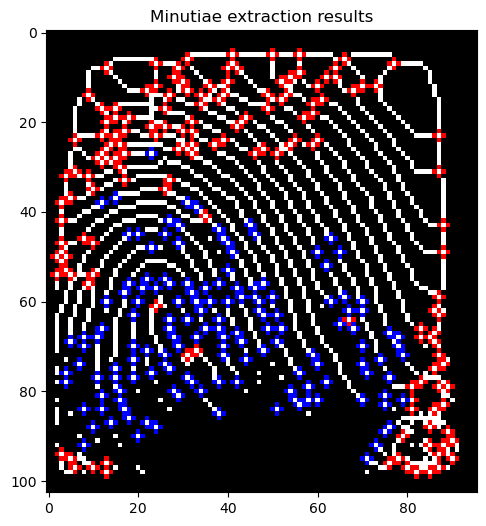

In [41]:
img_name = display_list[1]
img = cv2.imread(img_name,0);
img = np.array(img > THRESHOLD1).astype(int)
skel = skimage.morphology.skeletonize(img)
skel = np.uint8(skel)*255;
mask = img*255;

(minutiaeTerm, minutiaeBif) = getTerminationBifurcation(skel, mask);
FeaturesTerm, FeaturesBif = extractMinutiaeFeatures(skel, minutiaeTerm, minutiaeBif)
# for t in FeaturesTerm:
#     print(str(t))
# for b in FeaturesBif:
#     print(str(b))
#print(FeaturesTerm)
#print(FeaturesBif)
print("--------")
BifLabel = skimage.measure.label(minutiaeBif, connectivity=1);
TermLabel = skimage.measure.label(minutiaeTerm, connectivity=1);
ShowResults(skel, TermLabel, BifLabel)